# Intro to Scientific Computing

${\bf Problem \,Set\, 2}$

NAME:Brian Tong

DATE:January 29, 2016

To hand in your homework, please print out your completed iPython Notebook and bring to class on the due date: 
${\bf Friday, Jan. 29}$

# The Mighty San Lorenzo

## Data acquisition and wrangling

In this homework set, we'll work with real data to understand how rainfall and stream flow are correlated in the San Lorenzo River watershed. A big part of scientific computing involves data analysis and modeling, and a big part of data analysis and modeling involves the process of "wrangling" -- that is, manipulating the data from its raw source into a form that can be analyzed.

For more context on the point above, please read this New York Times article:

http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html

which includes the following telling anecdote:

"Data scientists, according to interviews and expert estimates, spend from 50 percent to 80 percent of their time mired in the more mundane labor of collecting and preparing unruly digital data, before it can be explored for useful nuggets."

To do a study of rainfall and stream flow, we'll use the USGS San Lorenzo Stream Flow data that we worked with in class, and we'll also use historical rainfall data from the National Oceanic and Atmospheric Administration (NOAA). This will give us a sense of the kinds of day-to-day challenges that data scientists face in the real world.

## 1) The NOAA rainfall data

Lets start with the NOAA data. We want to get data from a rain gauge that is representative of the San Lorenzo River watershed. To get the data, go to: http://www.ncdc.noaa/gov/cdo-web/

(1) Navigate to "Browse data sets"

(2) Select "Precipitation 15 minute", then select "Search Tool"

(3) Choose a start date of Jan 01, 2009, and an end date of Jan 01, 2014

(4) Search for ZIP Codes, and use 95060 (ZIP code for Santa Cruz) as the search term

(5) Add the data product to the cart

(6) Continue through, making sure that you select "Precipitation" when prompted.

(7) Once you've completed the (free) checkout, you'll get an e-mail with a link to your data.

Alternately, if this process doesn't work for you, I've placed the data on dropbox:

https://dl.dropboxusercontent.com/u/65190904/RainfallData.txt

In the interest of getting the best educational experience, however, please make a reasonable effort to get the data from the NOAA site yourself. 

Paste the subject line of your e-mail from NOAA into the cell below:

## 2) Setting up the arrays

First set up a list, "x", which contains a grid of uniform 15-minute intervals from our start time (2009/01/01 00:00) to our finish time (2013/12/31 23:45).  Next, populate corresponding lists "y" and "z" with zeros. These lists y and z will eventually be filled with rainfall and streamflow measurements at the times they they are available from the data that we get from the NOAA and USGS sources. As we'll see, this will involve some wrangling, as the data sources, unfortunately, aren't perfect in their as-provided form.


In [441]:
#First, here are the packages that we'll import for this exercise
# you should find what you need in these packages and their documentation
%matplotlib inline

from matplotlib.pyplot import *
from numpy import *
import dateutil.parser as dparser
from datetime import *
from operator import indexOf

In the cell below, set up x,y,and z, populate x with datetime objects that give (year, month,day, hours, and minutes) in fifteen minute intervals starting with Midnight, Jan 1, 2009 and ending with 23:45 on New Year's Eve 2013. 

In [318]:
# We'll get you started by defining these objects 
datetime_start = datetime(2009,1,1,0,0)
datetime_end   = datetime(2013,12,31,23,45)
x=[]
y=[]
z=[]

one_inc = timedelta(minutes=15)

#create an array starting from 1/1/2009 - 12/31/2013
#define variables
x=arange(datetime_start,datetime_end+ one_inc, one_inc).astype(datetime)
y= [0]* len(x)
z= [0] *len(x)

Print the total number of entries in your x, y, and z lists, along with the starting and finishing datetime objects

In [319]:
print "The total number of entries in x, y, and z list are", len(x), len(y), len(z),"respectively."
print "Starting datetime", x[0], "\nFinishing datetime:", x[-1]

The total number of entries in x, y, and z list are 175296 175296 175296 respectively.
Starting datetime 2009-01-01 00:00:00 
Finishing datetime: 2013-12-31 23:45:00


## 3) wrangling the rainfall data

After stripping the header lines of the rainfall file, a sample line of the comma-delimited rainfall data looks like this:

COOP:041005,BOULDER CREEK LOCAT CA US,20090106 11:45,27,10

An unpleasant feature of the data is that the lines are only populated for 15-minute intervals in which an additional increment of 0.1 inch or more of rainfall has accumulated. The last column is the precipitation in 1/100ths of an inch. Over the 5-year period from 01/01/2009 to 01/01/2014, there are 2460 records, some of which are "missing", with code -9999.

More information about the format of the data file can be found at:

http://www1.ncdc.noaa.gov/pub/data/cdo/documentation/PRECIP_15_documentation.pdf

Populate the appropriate time-ordered entries of the y array defined above with rainfall amounts that correspond to the data in the rainfall data file. Note that the vast majority of the entries in the y array will have their default zero values.

In [320]:
# Populate the date into these empty list objects
xRGinput=[]
yRGinput=[]

#open text file and read the lines 
f=open('674311.txt', 'r')
f.seek(0)
for line in f: 
    spl=line.split()    
    xRGinput.append(dparser.parse(spl[-4] +' '+ spl[-3], fuzzy =True))
    yRGinput.append(float(spl[-1]))

#define variables
xRGinput=array(xRGinput).astype(datetime)                   #date time
yRGinput=array(yRGinput)                                    #1/100ths of an inch

#get rid of the "missing" values
for i in range(len(yRGinput)):
    if yRGinput[i] == -9999 or yRGinput[i] == 99999:
        yRGinput[i] = 0

#match the x & y array with the xRGinput & yRGinput values
n = 0
for i in range(len(xRGinput)-1):
    n = indexOf(x, xRGinput[i])
    y[n] = yRGinput[i]

Based on the five years of data, what is the average rainfall in inches per year observed by the weather station?

In [324]:
aRainFall = sum(y)/5/100
print aRainFall, "inches per year"                 #inches per year

33.06 inches per year


Plot the cumulative rainfall over the five years of observation, normalized (1) to inches on the y-axis, and (2) normalized to unity. Label the x and the y axes, and make sure that the tick mark labels (which show dates) don't overlap.

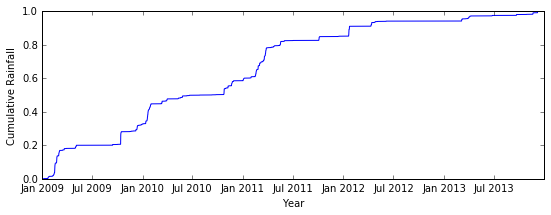

In [19]:
# Check your work loading the data so far: Here's what your plot should look like

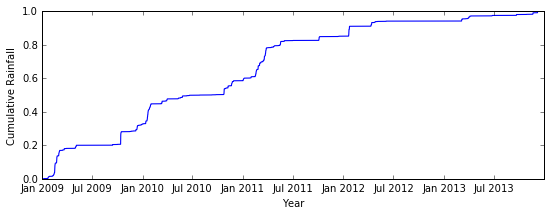

In [325]:
# Make your own plot here....
fig = figure(figsize=(9, 3), dpi=100)
xlabel("Year")
ylabel("Cumulative Rainfall")
plot(x,cumsum(y)/sum(y), lw = 1.1)

## 4) wrangling the river flow

Next, let's read in the river flow data for the same 2009-2014 five-year period from the USGS San Lorenzo Big Trees Gauge:

http://waterdata.usgs.gov/usa/nwis/uv?site_no=11160500

As before, we'd prefer if you get the data from the source, to improve the "real world" part of the homework experience, but if necessary, the data is also on Dropbox:

https://dl.dropboxusercontent.com/u/65190904/RiverflowData.txt

Note that we went through this process in class. Place the times and flow measurements in two lists named xSLinput and ySLinput (for the times and flows respectively):

In [331]:
# start with these lists
xSLinput=[]
ySLinput=[]

#open text file and read the lines
f=open('RiverFlow.txt', 'r')
f.seek(0)
for line in f: 
    spl=line.split()    
    xSLinput.append(dparser.parse(spl[2] + ' '+ spl[3], fuzzy =True))
    ySLinput.append(float(spl[5]))

#define variables
xSLinput = array(xSLinput).astype(datetime)   #date time
ySLinput = array(ySLinput)                    #cubic feet per sec

Populate the appropriate time-ordered entries of the z array defined above with streamflow amounts that correspond to the data in ySLinput, your streamflow array. You'll want to pay attention to doing this efficiently. As is sometimes the case with Python, a "naive" implementation can be very slow. Come to section for help if you need it!

In [332]:
n = 0
for i in range(len(xSLinput)):
    if xSLinput[i] <= datetime_end:
        n = indexOf(x,xSLinput[i])
        z[n] = ySLinput[i]

## 5) and finally some actual data analysis!

Once the above cell finishes computing, we have our data in three lists, x=times, y=rainfall measurements, z=streamflow, we can start to do some interesting stuff.

Make new arrays, x2day, y2day, and z2day which hold the (1) the datetimes, (2) the total precipitation and (3) the average stream flow for each 2-day interval in the overall data set. Make a plot of log10 average stream flow versus 2-day precipitation totals. Label the x and y axes. Make a second plot that zooms in "reasonably" on the part of the graph that contains most of the points.

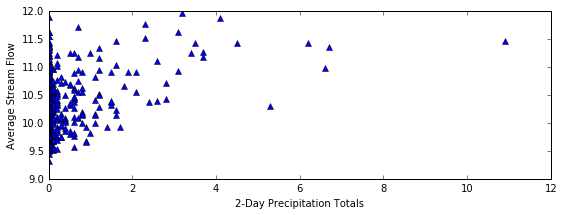

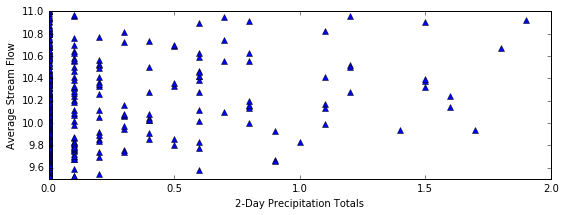

In [584]:
x2day = arange(datetime_start, datetime_end, timedelta(days=2)).astype(datetime)
y2day = [0] * len(x2day)
z2day = [0] * len(x2day)

n = 0 

#192 intervals to make 2-days
for i in range(len(x2day)):
    y2day[i] = sum(y[n:(i+1)*192])/100              #1/100th of an inch so convert. This also gets 2-day worth of data and puts it into one index
    z2day[i] = sum(z[n:192*(i+1)])*12**3*3600*2*24/192   #cubic feet per s to cubic inch per 2 day. This also gets 2-day worth of data and puts it into one index
    n += 192
    
fig = figure(figsize=(9,3),dpi=100)
ylabel("Average Stream Flow")
xlabel("2-Day Precipitation Totals")
plot(y2day,log10(z2day), '^')

#zoomed in graph
fig = figure(figsize=(9,3),dpi=100)
ylabel("Average Stream Flow")
xlabel("2-Day Precipitation Totals")
axis([0,2,9.5,11])
plot(y2day,log10(z2day), '^')

Next, make a plot that shows the cumulative sum of the rainfall and the cumulative sum of the stream flow over the full 5-year interval. These should both be normalized to unity in order to facilitate a comparison.

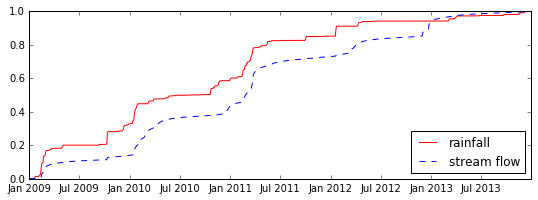

In [580]:
fig = figure(figsize=(9,3),dpi=100)
plot(x2day, cumsum(y2day)/sum(y2day), 'r')
plot(x2day, cumsum(z2day)/sum(z2day), 'b--')
legend(['rainfall','stream flow'], loc = 4)

In the above plot, there is clearly good correlation up until December 2012, when the stream flow jumps in the absence of rainfall. There's clearly missing rainfall data from December 2012! To see this another way, make a plot that shows log(stream flow) and cumulated rainfall on the same graph.



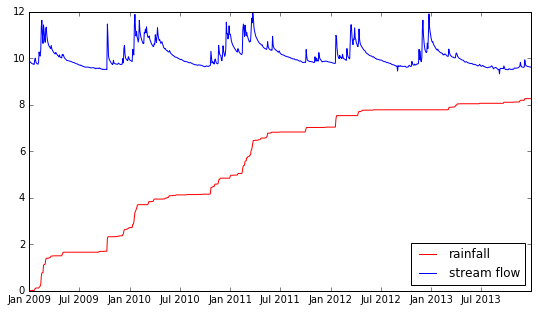

In [589]:
fig = figure(figsize=(9,5),dpi=100)
plot(x2day, cumsum(y2day)/20,'r')
plot(x2day, log10(z2day))
legend(['rainfall','stream flow'], loc=4)

Using the data, produce an estimate of how much rain occurred in December 2012.

In [586]:
#zoom in plot of Decemeber 2012 
time1 = datetime(2012,12,1,0,0)
time2 = datetime(2013,1,2,0,0)

#finding the index of Decemeber 2012
start = 0
end = 0
for i in range(len(x2day)):
    if x2day[i] == time1:
        start = i
    if x2day[i] == time2:
        end = i + 1
        
length = end - start

#looking at the previous plots, I can say that there is a correlation between stream flow and rainfall.
#The stream flow acts as a minimum limit to the rainfall.
print "The estimate amount of rain occurred in December 2012 is",(sum(log10(z2day[start:end]))/length)**(1./3), "inches"


The estimate amount of rain occurred in December 2012 is 2.21241257206 inches
